<a href="https://colab.research.google.com/github/Tim3s/Machine-Learning-Study/blob/main/9-3%20LSTM%20and%20GRU%20Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 21ms/step - loss: 0.6919 - accuracy: 0.5585 - val_loss: 0.6903 - val_accuracy: 0.6032
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6873 - accuracy: 0.6260 - val_loss: 0.6829 - val_accuracy: 0.6562
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6673 - accuracy: 0.6561 - val_loss: 0.6373 - val_accuracy: 0.6844
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6096 - accuracy: 0.7212 - val_loss: 0.5909 - val_accuracy: 0.7340
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5794 - accuracy: 0.7447 - val_loss: 0.5704 - val_accuracy: 0.7422
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5580 - accuracy: 0.7562 - val_loss: 0.5525 - val_accuracy: 0.7550
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5374 - accuracy: 0.7663 - val_loss: 0.5330 - val_accuracy

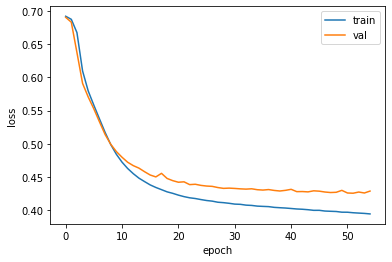

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6924 - accuracy: 0.5267 - val_loss: 0.6916 - val_accuracy: 0.5422
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6894 - accuracy: 0.5840 - val_loss: 0.6878 - val_accuracy: 0.6090
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6833 - accuracy: 0.6245 - val_loss: 0.6784 - val_accuracy: 0.6530
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6657 - accuracy: 0.6556 - val_loss: 0.6483 - val_accuracy: 0.6720
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6064 - accuracy: 0.6999 - val_loss: 0.5739 - val_accuracy: 0.7398
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5574 - accuracy: 0.7437 - val_loss: 0.5445 - val_accuracy: 0.7510
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5329 - accuracy: 0.7559 - val_loss: 0.5211 - val_accuracy:

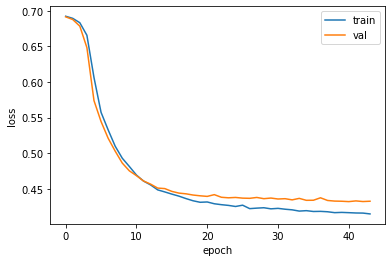

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


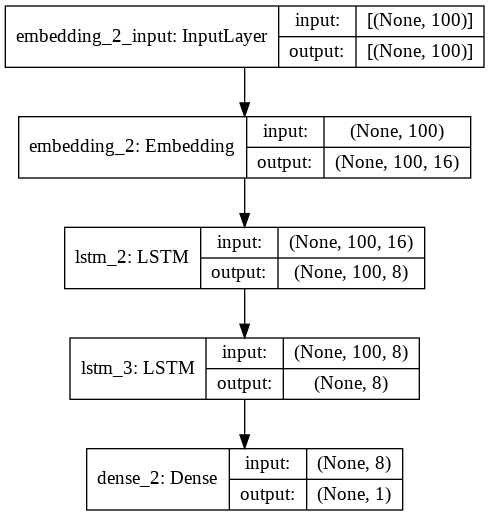

In [13]:
keras.utils.plot_model(model3, show_shapes=True)

In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 43ms/step - loss: 0.6926 - accuracy: 0.5373 - val_loss: 0.6919 - val_accuracy: 0.5402
Epoch 2/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6879 - accuracy: 0.6023 - val_loss: 0.6798 - val_accuracy: 0.6282
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6433 - accuracy: 0.6668 - val_loss: 0.6049 - val_accuracy: 0.7004
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5857 - accuracy: 0.7128 - val_loss: 0.5693 - val_accuracy: 0.7264
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.5564 - accuracy: 0.7333 - val_loss: 0.5388 - val_accuracy: 0.7472
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5329 - accuracy: 0.7498 - val_loss: 0.5176 - val_accuracy: 0.7638
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.5155 - accuracy: 0.7589 - val_loss: 0.5037 - val_ac

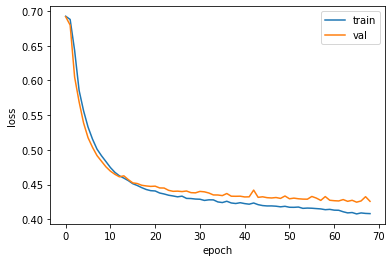

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [17]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6919 - accuracy: 0.5397 - val_loss: 0.6908 - val_accuracy: 0.5518
Epoch 2/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6880 - accuracy: 0.6029 - val_loss: 0.6860 - val_accuracy: 0.6026
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6802 - accuracy: 0.6389 - val_loss: 0.6758 - val_accuracy: 0.6414
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6638 - accuracy: 0.6603 - val_loss: 0.6528 - val_accuracy: 0.6670
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6225 - accuracy: 0.6921 - val_loss: 0.5868 - val_accuracy: 0.7106
Epoch 6/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5391 - accuracy: 0.7423 - val_loss: 0.5303 - val_accuracy: 0.7490
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5064 - accuracy: 0.7603 - val_loss: 0.5013 - val_accuracy:

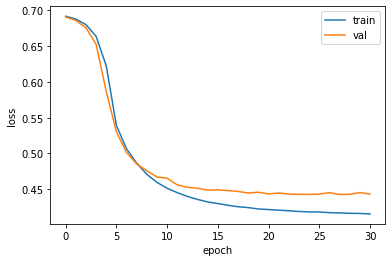

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)

In [20]:
for name in ['lstm', 'dropout', '2rnn', 'gru']:
    to_evaluate = keras.models.load_model('best-' + name + '-model.h5')
    to_evaluate.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4394 - accuracy: 0.7944
